# UFCFVQ-15-M Programming for Data Science (Spring 2022)
# Programming Task 2

## Student Id: 

### Requirement FR9 - Read CSV data from two files and merge it into a single Data Frame 

In [9]:
# import pandas to read the the csv file using .read_csv function. The next things is to merge the  data and not 
 
import pandas as pd

task2a_df = pd.read_csv('task2a.csv')   # Reads in the 2a data frame directly the way it is from memory
task2a_df # loads the data frame

task2b_df = pd.read_csv("task2b.csv")   # Reads in the 2b data frame directly the way it is from memory
task2b_df                               # loads the data frame

task2merge_df = pd.merge(task2a_df, task2b_df,on="timestamp")
task2merge_df 

,timestamp,new_bike_shares,temperature,feels_like_temp,humidity,wind_speed,is_weekend,season_code
0,04/01/2015 00:00,182,3.0,2.0,93.0,6.0,1,3
1,04/01/2015 01:00,138,3.0,2.5,93.0,5.0,1,3
2,04/01/2015 02:00,134,2.5,2.5,96.5,0.0,1,3
3,04/01/2015 03:00,72,2.0,2.0,100.0,0.0,1,3
4,04/01/2015 04:00,47,2.0,0.0,93.0,6.5,1,3
...,...,...,...,...,...,...,...,...
17409,03/01/2017 19:00,1042,5.0,1.0,81.0,19.0,0,3
17410,03/01/2017 20:00,541,5.0,1.0,81.0,21.0,0,3
17411,03/01/2017 21:00,337,5.5,1.5,78.5,24.0,0,3
17412,03/01/2017 22:00,224,5.5,1.5,76.0,23.0,0,3


<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

### Requirement FR10 - Clean the merged data

In [10]:
# cleaning this data removes redundant columns like 'season_code' as well as irrelevant figures like numbers less than 2

task2merge_df.isnull().sum()                  #gets the total number of null values in each columns 

task2merge_df=task2merge_df.dropna(how='any') #(How = any) means we didn't pass any argument in dropna() 
                                              #then it will delete all the rows with ANY NaN or missing value.
    
task2merge_df.dtypes                          #check the data type of all columns in the DataFrame

task2merge_df= task2merge_df.drop(columns='season_code')        #removes/drops the specified columns like 'season_code'
task2merge_df  

#Remove all rows from the merged data whose new_bike_shares is less than 20 and 
#returns all the rows in the data frame where new_bike_shares is great or equal to 20

task2merge_df= task2merge_df[task2merge_df.new_bike_shares>=20]     
task2merge_df


,timestamp,new_bike_shares,temperature,feels_like_temp,humidity,wind_speed,is_weekend
0,04/01/2015 00:00,182,3.0,2.0,93.0,6.0,1
1,04/01/2015 01:00,138,3.0,2.5,93.0,5.0,1
2,04/01/2015 02:00,134,2.5,2.5,96.5,0.0,1
3,04/01/2015 03:00,72,2.0,2.0,100.0,0.0,1
4,04/01/2015 04:00,47,2.0,0.0,93.0,6.5,1
...,...,...,...,...,...,...,...
17409,03/01/2017 19:00,1042,5.0,1.0,81.0,19.0,0
17410,03/01/2017 20:00,541,5.0,1.0,81.0,21.0,0
17411,03/01/2017 21:00,337,5.5,1.5,78.5,24.0,0
17412,03/01/2017 22:00,224,5.5,1.5,76.0,23.0,0


<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

### Requirement FR11 - Investigate the distribution of bike shares by time of the day

C:\Users\user\AppData\Local\Temp/ipykernel_12088/944229086.py:34: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(GroupByHOUR.index,GroupByHOUR['mean'],'-bo',color='g')


([<matplotlib.axis.XTick at 0x26453132640>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

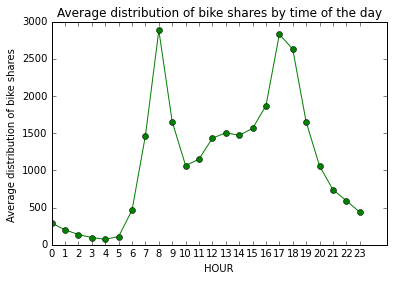

In [14]:
# add code here

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import datetime

# to convert the items in 'Timestamp' dataframe to datetime format with Pandas for easy manipulation
task2merge_df['timestamp'] = pd.to_datetime(task2merge_df['timestamp'])  #convert timestamp to dateTime function   
task2merge_df

#From the formated dataframe, create new columns for Hour, Day, month and year that would group the data for ease in visualising the data properly. It takes all the elements identified and extracts the identified element in the DateTime. The analysis is used for the subsequent questions below.
# This helps with the understanding that the company should be be highly staffed at this point such that they can support customers that are in need of service

task2merge_df['Hour'] = task2merge_df['timestamp'].apply(lambda time: time.hour)
task2merge_df['Month'] = task2merge_df['timestamp'].apply(lambda time: time.month)
task2merge_df['Day_of_Week'] = task2merge_df['timestamp'].apply(lambda time: time.dayofweek)
task2merge_df['Year'] = task2merge_df['timestamp'].apply(lambda t: t.year)
task2merge_df['Date'] = task2merge_df['timestamp'].apply(lambda t: t.day)

task2merge_df

# Define Group By Hour as a variable. This is the actual answer to Question 1
GroupByHOUR=task2merge_df.groupby('Hour')
GroupByHOUR=GroupByHOUR['new_bike_shares'].describe()

GroupByHOUR=pd.DataFrame(GroupByHOUR)

#GroupByHOUR=GroupByHOUR.reset_index()

GroupByHOUR 

# Plot a line graph to see the distribution 
plt.plot(GroupByHOUR.index,GroupByHOUR['mean'],'-bo',color='g')
plt.title("Average distribution of bike shares by time of the day")
plt.ylabel('Average distribution of bike shares ')
plt.xlabel('HOUR')
plt.xticks(np.arange(0, 24)) 

# The result is created by the taking the mean of all occurence within the specific timeframe. The graph explains that bike shares happens at peak period i.e 8.00AM and between 6:00PM and 7:00PM

<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

### Requirement FR12 - Compare the distribution of bike shares by time of the week

C:\Users\user\AppData\Local\Temp/ipykernel_12088/2748116209.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(GroupByweekday.index,GroupByweekday['mean'],'-bo',color='b')


Text(0.5, 0, 'days_of _week')

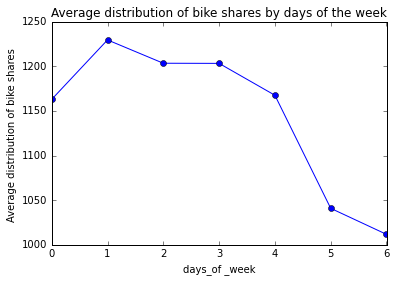

In [15]:
# Make use of the Group data created above to define the week data for analysis. It can be seen that the bike share takes place the most on second day of the week which is the is point 1 in the graph. The idea is to deploy resources more to this day much more than other days.
GroupByweekday=task2merge_df.groupby('Day_of_Week')
GroupByweekday=GroupByweekday['new_bike_shares'].describe()

GroupByweekday=pd.DataFrame(GroupByweekday)

#GroupByHOUR=GroupByHOUR.reset_index()

GroupByweekday

# Plot a line graph to see the distribution during the week
plt.plot(GroupByweekday.index,GroupByweekday['mean'],'-bo',color='b')
plt.title("Average distribution of bike shares by days of the week")
plt.ylabel('Average distribution of bike shares ')
plt.xlabel('days_of _week')

<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

### Requirement FR13 - Investigate the effects of “feels like” temperature on the number of bike shares

Text(0.5, 1.0, 'linear Fits for correlation between the “feels_like_temp” temperature and the number of bike shares')

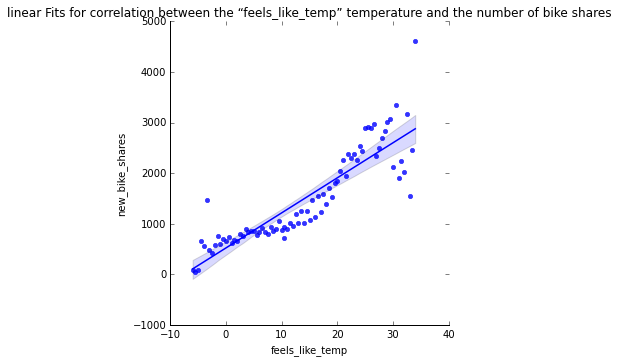

In [16]:
# This helps to check the correlation between temperature and the number of bikeshare. It helps to explain what drives bike share
# Also the mean value is used to get the idea of avaerage value
Itask2merge_df=task2merge_df[["feels_like_temp","new_bike_shares"]]
GItask2merge_df=Itask2merge_df.groupby('feels_like_temp').mean()

GItask2merge_df=pd.DataFrame(GItask2merge_df, columns=['new_bike_shares'])

GItask2merge_df=GItask2merge_df.reset_index()

GItask2merge_df
%matplotlib inline

# Test for interraction between feels_like_temp and number of bike shares 
sns.lmplot(y='new_bike_shares',x='feels_like_temp',data=GItask2merge_df)
plt.title("linear Fits for correlation between the “feels_like_temp” temperature and the number of bike shares")

# The scatter plot explains that there is a positive correlation between temperature and the number of bikeshare. The higher the temperature the more likely that individuals will share bikes. 

<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

### Requirement FR14 - Test the hypothesis that “feels like” temperature has an effect on the number of bike shares

In [17]:
# The stat model is a convenience interface for specifying linear models using formula strings and DataFrames. It  gives the summary of all the elements needed to explain the relationship between variables.
reg_mod = smf.ols(formula='new_bike_shares ~ feels_like_temp', data=GItask2merge_df).fit() # Fit regression model (using the natural log of one of the regressors)
print(reg_mod.summary())
# the summary gives a precise definition of the line of best fit 

                            OLS Regression Results                            
Dep. Variable:        new_bike_shares   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     293.8
Date:                Tue, 10 May 2022   Prob (F-statistic):           1.65e-28
Time:                        13:03:22   Log-Likelihood:                -611.69
No. Observations:                  82   AIC:                             1227.
Df Residuals:                      80   BIC:                             1232.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         522.4724     73.392     

<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

# Coding Standards
<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

# Process Development Report for Programming Task 2


The entire project in task 2 was to task our ability to develop codes to read actual data. It tests the steps involved in analysis data in real life situation. 
Prior to the commencement of the course, I had limited knowledge in python, but had extensive knowledge in Microsoft Excel. Based on my intterraction with Python on analysis, I can fully describe the steps and process taken to analyse results whereby I can explain simple steps like filter, sort etc.
Moreso, it provides more flexibility in defining interractive data and also further automating or animating the visualisations with libraries.
More specifically on the tasks given, I would be highlighting the steps involved and the results given in the last step.

FR9 is directed at reading files from two locations and merging, it is usually to read the file using pandas as a library to pick the file. It is usually best practice to place the file in the folder where the result would be dumped such that it is easily picked from another computer, Alternatively it could be picked from the internet. On the merger, I decided to merrge on what is common to both files which in this case is 'timestamp'. Timestamp is the intersection in both files and also to place the report side by side. It should be noted that in reality, the file size may not be the same in terms of length or the start period may not be the same, it would therefore be ideal for sort and filter and then trim to have the exact size of data.

FR10 required that I cleaned the data. Data cleaning is usually required to remove redundancies and leave data that is relevant to the analysis. In this case, I cjecked if there was any null data in the set as well as I dropped any 'Nan' row so that the data can be analysed easily. Also, I dropped season code which is not relevant in the analysis and as specified in the question. The next stage is to select the bike shares that are more than 20 and it is considered that some any share less that 20 is not relevant to the question. For the most part, it would be great to select relevant data set. Less than 20 value woulf further reduce the meanof the values and would reduce the actual data meaning. In this case it is very crucial to tak low values.

Before conducting any analysis, I created the space for importing the libraries that would be used for the assignment.

FR11 was at investigating the distribution of bike shares by time of the day. This is necessary to know how to deploy resources in a realife situation. In the course of the task, while plotting the graph the points came out not appealing. It was necessary to group the data as specified above. The first step was to format the date time and then to seperate the datetime component to the year, month, week, day etc such that each element would be used in the course of the assignement and then, group the data by the Hour of the day such that I could see specifically what is happening during each hour. In plotting the graph, I had to apply the mean of the figures so that I can get the possible vaule per hour. In  the case of working for a company, it helps to know how to deplpy resources based on the hour of the day and no one is stranded with time. From the graph you can tell that the highest bake share happens during peak period, which is most likely when workers are rushing to work or getting back home. I.e 8:00AM, 6:00PM and 7:00PM.

F12 deals with comparing the distribution of bike shares by time of the week. As defined above, I grouped the data by week so that I can tell which day of the week has the highest bike share. In this case, you can tell that the second day which is Monday has the highest bikeshare, it is not far-fetched, workers prefer to share bike on peak period which falls on Mondays. This helps the Management to direct resources adequately to maximise profit enough staff to support customers as well as not loose on high demands should there be a need. Also to reduce slack during low peak.  So also, I took the mean values to plot line graph. In addtion to that, I grouped the graph based on the week that was obtained in FR11

FR13 there are cases when you need to understand the key driver of human behavior in which case, you plot a scatter diagram to identify the relationship between two variables. One can conclude that temperature drives the number of bike shares positively, implying that there is a positive correlation between the variables, i.e, the higher the temperature, the higher the number of bikes that would be recorded. Also, I plotted the line of best fit. I made use of Seaborn to plot the graph and Matplotlib to label the diagram.

FR14 Test the hypothesis that feels like temperature has an effect on the number of bike shares. The result tests the hypothesis. My hypothesis would be that feels like temperature has a significant correlations. From the table Dependent Variable is ‘new_bike_shares,’ the library makes use of OLS known as Ordinary Least Squares. The R-squared is possibly the most important measurement to help with the hypothesis. R-squared is the measurement of how much of the independent variable (feels like temperture) is explained by changes in our dependent variables (new bike shares). In percentage terms, 0.786 would mean the model explains 78.6% of the change in ‘new bike shares’ variable. P value of 0.000 for (feels like temperture) is saying there is a 100.0% chance the feels_like_temperture variable has effect on the dependent variable, new_bike_shares, and the results are not produced by chance.

In summary, I can categorically say that I have learnt a great deal from the sessions of lectures in data visualisation maling use of the import libraries

References
Seabold, Skipper, and Josef Perktold. “statsmodels: Econometric and statistical modeling with python.” Proceedings of the 9th Python in Science Conference. 2010.
Panda Development team 2008-2022, Created using Sphinx 4.5.0.

<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>